In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
df_coffee = pd.read_csv('coffeeQuality.csv') 
df_coffee_original = df_coffee.copy()
df_coffee.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [2]:
#changing data format 
import re

def clean_and_convert_date(column):
    return pd.to_datetime(column.astype(str).str.replace(r'(\d{1,2})(st|nd|rd|th)', r'\1', regex=True).str.strip(),errors='coerce')

df_coffee['Grading.Date'] = clean_and_convert_date(df_coffee['Grading.Date'])
df_coffee['Expiration'] = clean_and_convert_date(df_coffee['Expiration'])

df_coffee['Grading.Date'] = df_coffee['Grading.Date'].dt.strftime('%d/%m/%Y')
df_coffee['Expiration'] = df_coffee['Expiration'].dt.strftime('%d/%m/%Y')


In [3]:
#upfilling details that are blank and has to be filled with forward and backward fill
df_coffee['Color'] = df_coffee['Color'].fillna(method = 'ffill')
df_coffee['Country.of.Origin'] = df_coffee['Country.of.Origin'].fillna(method = 'ffill')
df_coffee['Owner'] = df_coffee['Owner'].fillna(method = 'bfill')
df_coffee['Quakers'] = df_coffee['Quakers'].fillna(method = 'bfill')
df_coffee['Harvest.Year'] = df_coffee['Harvest.Year'].fillna(method = 'ffill')
df_coffee['Number.of.Bags'] = df_coffee['Number.of.Bags'].fillna(method = 'bfill')
df_coffee['Altitude'] = df_coffee['Altitude'].fillna(method = 'ffill')

C:\Users\manik\AppData\Local\Temp\ipykernel_19884\4283917326.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_coffee['Color'] = df_coffee['Color'].fillna(method = 'ffill')
C:\Users\manik\AppData\Local\Temp\ipykernel_19884\4283917326.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_coffee['Country.of.Origin'] = df_coffee['Country.of.Origin'].fillna(method = 'ffill')
C:\Users\manik\AppData\Local\Temp\ipykernel_19884\4283917326.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_coffee['Owner'] = df_coffee['Owner'].fillna(method = 'bfill')
C:\Users\manik\AppData\Local\Temp\ipykernel_19884\4283917326.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill()

In [4]:
#filling blank values with "Other" and "Unknown"
df_coffee['Variety'] = df_coffee['Variety'].fillna('Other')
df_coffee['Processing.Method'] = df_coffee['Processing.Method'].fillna('Other')
df_coffee['Farm.Name'] = df_coffee['Farm.Name'].fillna('Other') 
df_coffee['Farm.Name'] = df_coffee['Farm.Name'].replace('Other)', 'Unknown') 
df_coffee['Mill'] = df_coffee['Mill'].replace('unknown', 'Unknown')
df_coffee['Mill'] = df_coffee['Mill'].fillna('Unknown')
df_coffee['ICO.Number'] = df_coffee['ICO.Number'].replace('unknown', 'Unknown')
df_coffee['ICO.Number'] = df_coffee['ICO.Number'].replace('unkown', 'Unknown')
df_coffee['ICO.Number'] = df_coffee['ICO.Number'].fillna('Unknown')
df_coffee['Owner.1'] = df_coffee['Owner.1'].fillna('Unknown')
df_coffee['Company'] = df_coffee['Company'].fillna('Unknown')
df_coffee['Region'] = df_coffee['Region'].fillna('Unknown')
df_coffee['Producer'] = df_coffee['Producer'].replace('unkown', 'Unknown')
df_coffee['Producer'] = df_coffee['Producer'].fillna('Unknown')
df_coffee['Lot.Number'] = df_coffee['Lot.Number'].replace('none','Unknown')
df_coffee['Lot.Number'] = df_coffee['Lot.Number'].fillna('Unknown')

#filling blank values with mean for altitude_high,low and mean
#finding mean of the values
mean_altitude_low = df_coffee['altitude_low_meters'].mean()
df_coffee['altitude_low_meters'].fillna(mean_altitude_low, inplace = True)

mean_altitude_high = df_coffee['altitude_high_meters'].mean()
df_coffee['altitude_high_meters'].fillna(mean_altitude_high, inplace = True)

mean_altitude_mean = df_coffee['altitude_mean_meters'].mean()
df_coffee['altitude_mean_meters'].fillna(mean_altitude_mean, inplace = True)

df_coffee['altitude_mean_meters'] = df_coffee['altitude_mean_meters'].where(df_coffee['altitude_mean_meters'] <= 5000, mean_altitude_mean)

df_coffee['altitude_low_meters'] = df_coffee['altitude_low_meters'].where(df_coffee['altitude_low_meters'] <= 5000, mean_altitude_low)

df_coffee['altitude_high_meters'] = df_coffee['altitude_high_meters'].where(df_coffee['altitude_high_meters'] <= 5000, mean_altitude_high)

#renaming column name
df_coffee.rename(columns={df_coffee.columns[0]: 'ID'}, inplace=True)

df_coffee['Aroma'] = df_coffee_original['Aroma'].copy()

aroma_mean = df_coffee['Aroma'].mean()
df_coffee['Aroma'] = df_coffee['Aroma'].replace([0, 0.00], aroma_mean)

flavor_mean = df_coffee['Flavor'].mean()
df_coffee['Flavor'] = df_coffee['Flavor'].replace([0, 0.00], flavor_mean)

aftertaste_mean = df_coffee['Aftertaste'].mean()
df_coffee['Aftertaste'] = df_coffee['Aftertaste'].replace([0, 0.00], aftertaste_mean)

body_mean = df_coffee['Body'].mean()
df_coffee['Body'] = df_coffee['Body'].replace([0, 0.00], body_mean)

acidity_mean = df_coffee['Acidity'].mean()
df_coffee['Acidity'] = df_coffee['Acidity'].replace([0, 0.00], acidity_mean)

sweetness_mean = df_coffee['Sweetness'].mean()
df_coffee['Sweetness'] = df_coffee['Sweetness'].replace([0, 0.00], sweetness_mean)

balance_mean = df_coffee['Balance'].mean()
df_coffee['Balance'] = df_coffee['Balance'].replace([0, 0.00], balance_mean)

cup_mean = df_coffee['Clean.Cup'].mean()
df_coffee['Clean.Cup'] = df_coffee['Clean.Cup'].replace([0, 0.00], cup_mean)

cupper_mean = df_coffee['Cupper.Points'].mean()
df_coffee['Cupper.Points'] = df_coffee['Cupper.Points'].replace([0, 0.00], cupper_mean)

uniformity_mean = df_coffee['Uniformity'].mean()
df_coffee['Uniformity'] = df_coffee['Uniformity'].replace([0, 0.00], uniformity_mean)

cup_points_mean = df_coffee['Total.Cup.Points'].mean()
df_coffee['Total.Cup.Points'] = df_coffee['Total.Cup.Points'].replace([0, 0.00], cup_points_mean)

moisture_mean = df_coffee['Moisture'].mean()
df_coffee['Moisture'] = df_coffee['Moisture'].replace([0, 0.00], moisture_mean)

category1_mean = df_coffee['Category.One.Defects'].mean()
df_coffee['Category.One.Defects'] = df_coffee['Category.One.Defects'].replace([0, 0.00], category1_mean)

category2_mean = df_coffee['Category.Two.Defects'].mean()
df_coffee['Category.Two.Defects'] = df_coffee['Category.Two.Defects'].replace([0, 0.00], category1_mean)

df_coffee['Aroma'] = df_coffee['Aroma'].where(df_coffee['Aroma'] <= 10, 8)

df_coffee['altitude_mean_meters'] = df_coffee['altitude_mean_meters'].where(df_coffee['altitude_mean_meters'] <= 5000, mean_altitude_mean)

df_coffee['Bag.Weight'] = df_coffee['Bag.Weight'].str.replace(r'kg|lbs|kg,lbs', '', case=False, regex=True)
df_coffee['Bag.Weight'] = df_coffee['Bag.Weight'].astype(str) + ' kg'
df_coffee['Bag.Weight.Numeric'] = df_coffee['Bag.Weight'].str.extract(r'(\d+\.?\d*)').astype(float)


df_coffee['Altitude'] = df_coffee['Altitude'].replace(['mts', 'meters', 'm', 'msnm', 'masl', 'metros', 'm.s.l', 'feet', 'ft'], 'm', regex=True)

df_coffee['Country.of.Origin'] = df_coffee['Country.of.Origin'].replace(r'United States (Hawaii)', 'United States')
df_coffee['Country.of.Origin'] = df_coffee['Country.of.Origin'].replace(r'United States (Puerto Rico)', 'United States')


C:\Users\manik\AppData\Local\Temp\ipykernel_19884\923301222.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_coffee['altitude_low_meters'].fillna(mean_altitude_low, inplace = True)
C:\Users\manik\AppData\Local\Temp\ipykernel_19884\923301222.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

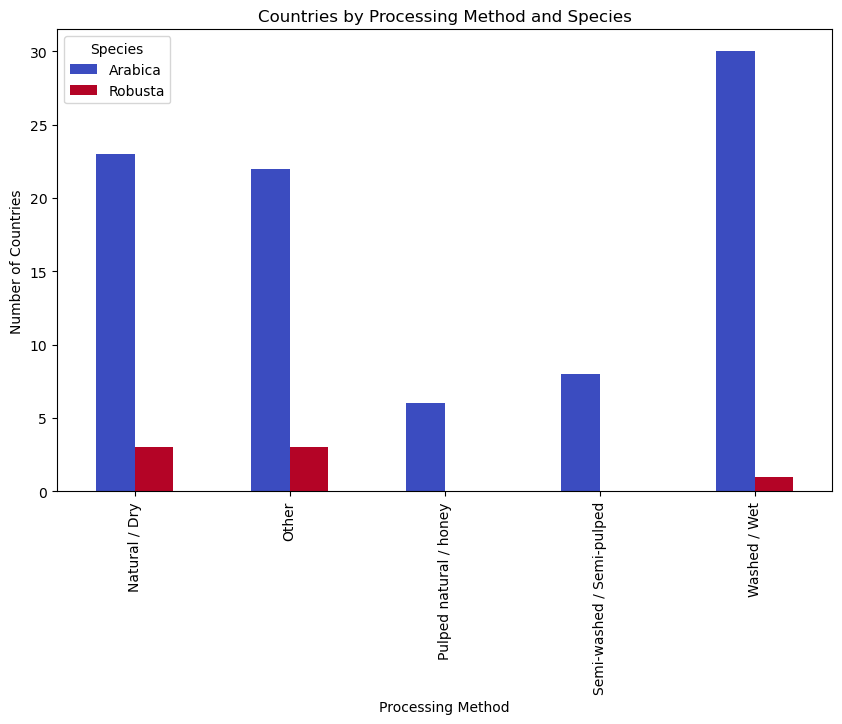

In [5]:
# Group by 'Processing.Method' and 'Species' to get the count of unique 'Country.of.Origin'
processing_method_species_count = df_coffee.groupby(['Processing.Method', 'Species'])['Country.of.Origin'].nunique().unstack(fill_value=0)

# Plotting
ax = processing_method_species_count.plot(kind='bar', figsize=(10,6), colormap='coolwarm')

# Adding title and labels
plt.title('Countries by Processing Method and Species')
plt.xlabel('Processing Method')
plt.ylabel('Number of Countries')
plt.legend(title='Species')

plt.show()

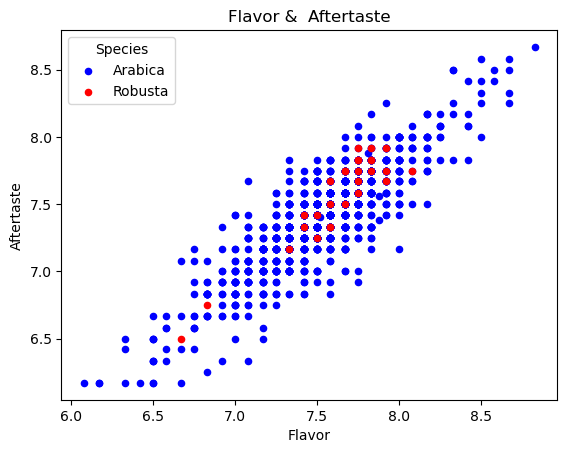

In [6]:
#bivariate - scatterplot 
Flavor = df_coffee['Flavor']
Aftertaste = df_coffee['Aftertaste']
species_1_data = df_coffee[df_coffee['Species'] == 'Arabica']  
species_2_data = df_coffee[df_coffee['Species'] == 'Robusta'] 
plt.scatter(species_1_data['Flavor'], species_1_data['Aftertaste'], color='blue', label='Arabica', s = 20) 
plt.scatter(species_2_data['Flavor'], species_2_data['Aftertaste'], color='red', label='Robusta', s = 20) 
plt.title('Flavor &  Aftertaste')
plt.xlabel('Flavor')
plt.legend(title='Species')
plt.ylabel('Aftertaste')
plt.show()

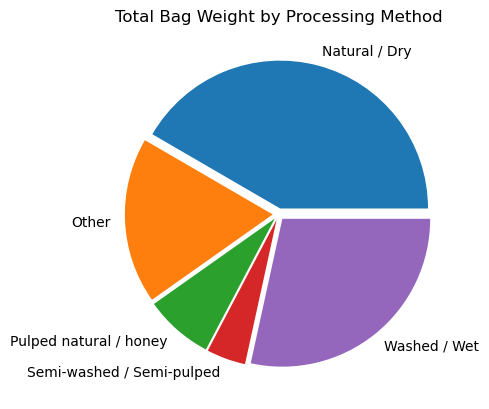

In [7]:
#Piechart
weight_by_method = df_coffee.groupby('Processing.Method')['Bag.Weight.Numeric'].mean()
explode = [0.04] * len(weight_by_method) 
plt.pie(weight_by_method, labels=weight_by_method.index, explode = explode)
plt.title('Total Bag Weight by Processing Method')
plt.show()

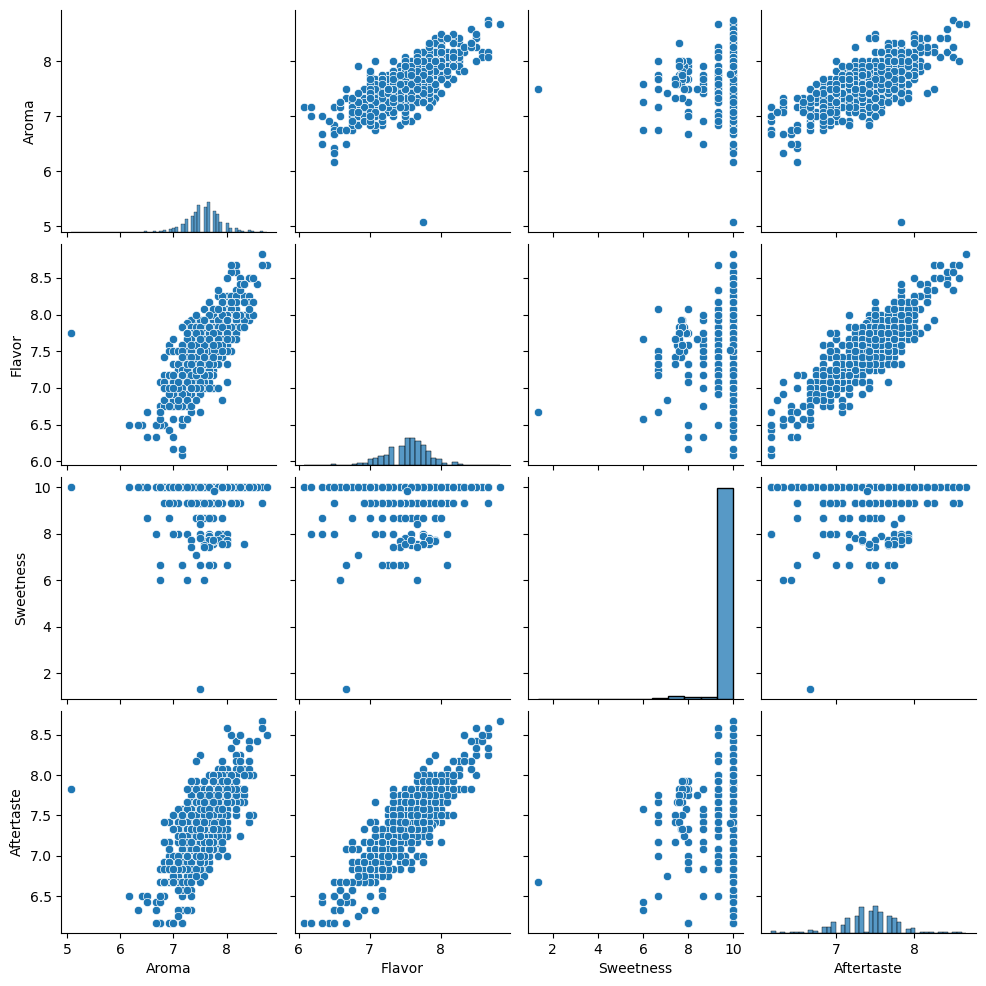

In [8]:
#Multivariate - pairplot 
columns = ['Aroma','Flavor','Sweetness','Aftertaste']
sns.pairplot(df_coffee[columns])
plt.show()

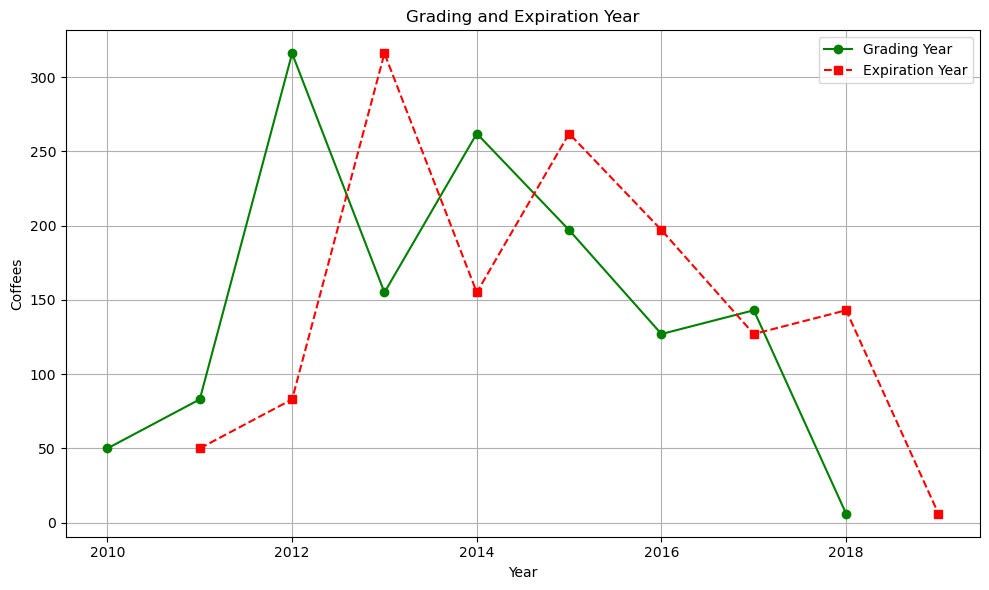

In [9]:
#bivariate - line chart
df_coffee['Grading_Year'] = pd.to_datetime(df_coffee['Grading.Date'], dayfirst=True).dt.year
df_coffee['Expiration_Year'] = pd.to_datetime(df_coffee['Expiration'], dayfirst=True).dt.year
grading_counts = df_coffee.groupby('Grading_Year')['ID'].nunique().reset_index()
expiration_counts = df_coffee.groupby('Expiration_Year')['ID'].nunique().reset_index()
plt.figure(figsize=(10,6))

plt.plot(grading_counts['Grading_Year'], grading_counts['ID'], marker='o', linestyle='-', color='green', label='Grading Year')
plt.plot(expiration_counts['Expiration_Year'], expiration_counts['ID'], marker='s', linestyle='--', color='red', label='Expiration Year')

plt.title('Grading and Expiration Year')
plt.xlabel('Year')
plt.ylabel('Coffees')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

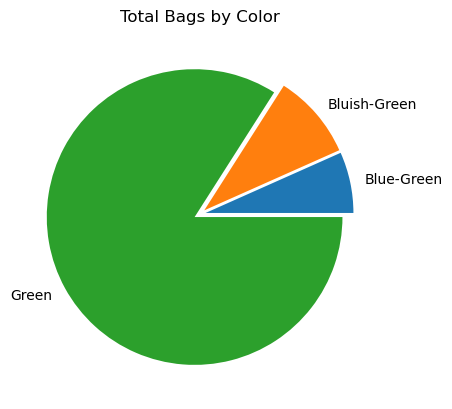

In [10]:
#Piechart
#Piechart
Color = df_coffee.groupby('Color')['Number.of.Bags'].sum()
explode = [0.04] * len(Color) 
plt.pie(Color, labels=Color.index, explode=explode)
plt.title('Total Bags by Color')
plt.show()

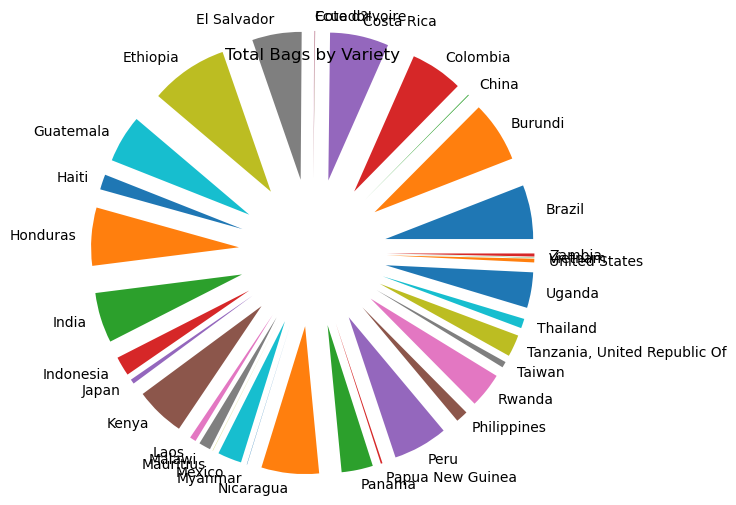

In [11]:
#Piechart
Variety = df_coffee.groupby('Country.of.Origin')['Number.of.Bags'].mean()
explode = [.5] * len(Variety) 
plt.pie(Variety, labels=Variety.index, explode=explode)
plt.title('Total Bags by Variety')
plt.show()

In [12]:
#T-test for flavor
arabica_flavor = df_coffee[df_coffee['Species'] == 'Arabica']['Flavor']
robusta_flavor = df_coffee[df_coffee['Species'] == 'Robusta']['Flavor']

print("Mean of Arabica Flavor:", arabica_flavor.mean())
print("Variance of Arabica Flavor:", arabica_flavor.var())

print("Mean of Robusta Flavor:", robusta_flavor.mean())
print("Variance of Robusta Flavor:", robusta_flavor.var())

t_statistic, p_value = stats.ttest_ind(arabica_flavor, robusta_flavor)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: Means are significantly different.")
else:
    print("Fail to reject the null hypothesis: Means are not significantly different.")

Mean of Arabica Flavor: 7.5238065794743045
Variance of Arabica Flavor: 0.11680435399176338
Mean of Robusta Flavor: 7.630714285714285
Variance of Robusta Flavor: 0.09220687830687833
Fail to reject the null hypothesis: Means are not significantly different.


In [13]:
#T-test for Aftertaste
arabica_aftertaste = df_coffee[df_coffee['Species'] == 'Arabica']['Aftertaste']
robusta_aftertaste = df_coffee[df_coffee['Species'] == 'Robusta']['Aftertaste']

print("Mean of Arabica Aftertaste:", arabica_aftertaste.mean())
print("Variance of Arabica Aftertaste:", arabica_aftertaste.var())

print("Mean of Robusta Aftertaste:", robusta_aftertaste.mean())
print("Variance of Robusta Aftertaste:", robusta_aftertaste.var())

t_statistic, p_value = stats.ttest_ind(arabica_aftertaste, robusta_aftertaste)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: Means are significantly different.")
else:
    print("Fail to reject the null hypothesis: Means are not significantly different.")

Mean of Arabica Aftertaste: 7.40334178710731
Variance of Arabica Aftertaste: 0.12231371032543667
Mean of Robusta Aftertaste: 7.559642857142856
Variance of Robusta Aftertaste: 0.11728505291005291
Reject the null hypothesis: Means are significantly different.


In [14]:
#Z-test for Aroma
from statsmodels.stats.weightstats import ztest

dataset_coffee = df_coffee.dropna(subset=['Aroma']).sample(100, replace=True)
population_mean = 7.5 
sample_mean = dataset_coffee['Aroma'].mean()
print("Sample Mean:", sample_mean)

standard_deviation = dataset_coffee['Aroma'].std()
print("Standard deviation:", standard_deviation)

zstat, p_value = ztest(dataset_coffee['Aroma'], value=population_mean)
print("z-statistic:", zstat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: Sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: Sample mean is not significantly different from the population mean.")

Sample Mean: 7.591
Standard deviation: 0.3025998457809697
z-statistic: 3.0072718565054575
p-value: 0.002636039072920398
Reject the null hypothesis: Sample mean is significantly different from the population mean.


In [15]:
#Z-test for Altitude 
dataset_coffee = df_coffee.dropna(subset=['altitude_mean_meters']).sample(100, replace=True)

population_mean = 1500 
sample_mean = dataset_coffee['altitude_mean_meters'].mean()
print("Sample Mean:", sample_mean)

standard_deviation = dataset_coffee['altitude_mean_meters'].std()
print("Standard deviation:", standard_deviation)

zstat, p_value = ztest(dataset_coffee['altitude_mean_meters'], value=population_mean)
print("z-statistic:", zstat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: Sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: Sample mean is not significantly different from the population mean.")

Sample Mean: 1422.1058035491435
Standard deviation: 454.2277849168613
z-statistic: -1.714870799132504
p-value: 0.08636891745541835
Fail to reject the null hypothesis: Sample mean is not significantly different from the population mean.


In [16]:
# Descriptive statistics 
stats_of_important_columns = df_coffee[['Aroma', 'Flavor', 'Aftertaste', 'Altitude', 'Moisture']].describe()

print(stats_of_important_columns)

             Aroma       Flavor   Aftertaste     Moisture
count  1339.000000  1339.000000  1339.000000  1339.000000
mean      7.572442     7.526042     7.406610     0.105804
std       0.315415     0.341255     0.350173     0.022060
min       5.080000     6.080000     6.170000     0.010000
25%       7.420000     7.330000     7.250000     0.090000
50%       7.580000     7.580000     7.420000     0.110000
75%       7.750000     7.750000     7.580000     0.120000
max       8.750000     8.830000     8.670000     0.280000


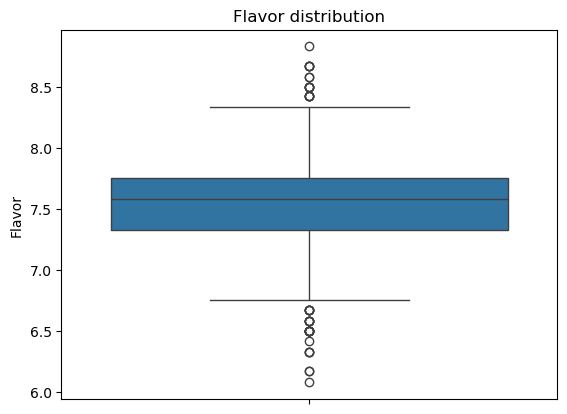

In [17]:
sns.boxplot(df_coffee['Flavor'])
plt.title('Flavor distribution')
plt.show()

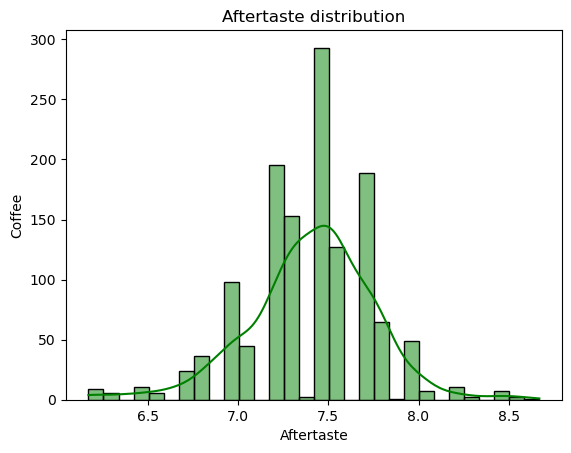

In [18]:
#Univariate analysis
#Visualization of Quality 
#histogram
sns.histplot(df_coffee['Aftertaste'], bins = 30, kde = True, color = 'g')
plt.title('Aftertaste distribution')
plt.xlabel('Aftertaste')
plt.ylabel('Coffee')
plt.show()

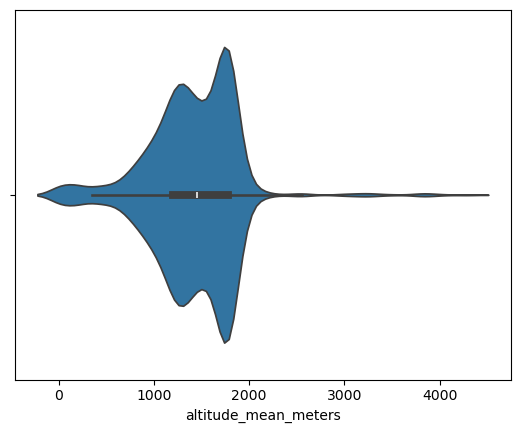

In [19]:
sns.violinplot(x=df_coffee['altitude_mean_meters'])
plt.show()

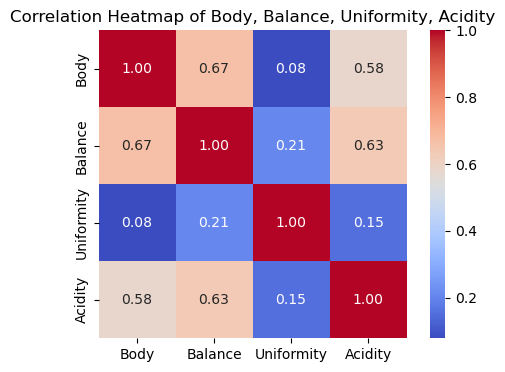

In [20]:
#multivariate - co-relation
subset = df_coffee[['Body', 'Balance', 'Uniformity', 'Acidity']]
corr = subset.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Body, Balance, Uniformity, Acidity')
plt.show()